In [1]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn import svm, metrics, datasets
from sklearn.metrics import confusion_matrix, recall_score
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import cv2

In [2]:
train_path = r"C:\Users\BlackFlameSG\Documents\Python Scripts\ML\Project\ANN_Image\gender_eye\data\train"
test_path = r"C:\Users\BlackFlameSG\Documents\Python Scripts\ML\Project\ANN_Image\gender_eye\data\test"

In [204]:
#this generator is like an image filter which first normalizes the data by dividing each element by 255 so it's in the range 0-1
#second it splits the data into 10% validation and 90% training
training_generator = ImageDataGenerator(rescale=1./255,
                                        validation_split=0.1)
#now we load the training data from our directory
training_dataset = training_generator.flow_from_directory(train_path,
                                                        target_size = (32, 32),
                                                        batch_size = 64,
                                                        subset = 'training',
                                                        color_mode="grayscale",
                                                        class_mode='binary',
                                                        shuffle = True)
#here we load the validation data
validation_dataset = training_generator.flow_from_directory(train_path,
                                                        target_size = (32, 32),
                                                        batch_size = 64,
                                                        subset = 'validation',
                                                        color_mode="grayscale",
                                                        class_mode = 'binary',
                                                        shuffle = True)


Found 8298 images belonging to 2 classes.
Found 921 images belonging to 2 classes.


In [205]:
#it prints the classes
training_dataset.class_indices.keys()

dict_keys(['femaleeyes', 'maleeyes'])

In [206]:
#the generator for the test
test_generator = ImageDataGenerator(rescale=1./255)
#we load the test data
test_dataset = test_generator.flow_from_directory(test_path,
                                                target_size = (32, 32),
                                                batch_size = 1,
                                                color_mode="grayscale",
                                                class_mode = 'binary',
                                                shuffle = False)

Found 2306 images belonging to 2 classes.


In [234]:
#the model starts here sequential is the standard for ANN
model = Sequential()
model.add(Flatten(input_shape=(32,32,1)))

model.add(Dense(256, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(16, activation='relu'))

model.add(Dense(1, activation='sigmoid'))

In [235]:
model.summary()

Model: "sequential_29"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_29 (Flatten)        (None, 1024)              0         
                                                                 
 dense_151 (Dense)           (None, 256)               262400    
                                                                 
 dense_152 (Dense)           (None, 128)               32896     
                                                                 
 dense_153 (Dense)           (None, 64)                8256      
                                                                 
 dense_154 (Dense)           (None, 32)                2080      
                                                                 
 dense_155 (Dense)           (None, 16)                528       
                                                                 
 dense_156 (Dense)           (None, 1)               

In [236]:
#this here is the optimizer we choose Adam and we choose this learning rate
opti = tf.keras.optimizers.Adam(learning_rate=0.00001)
#here we compile the model and binary cross entropy is our chosen loss function and it's the best loss function for binary classification
model.compile(optimizer=opti, loss='binary_crossentropy', metrics = ['accuracy'])

In [231]:
#checkpoint to hold the best weights found yet
checkpoint = tf.keras.callbacks.ModelCheckpoint(filepath="weights.h5", verbose=1, save_best_only=True)
#here we train the model
historic = model.fit(training_dataset, validation_data = validation_dataset, epochs=150, verbose=1, callbacks=[checkpoint])

Epoch 1/150
129/130 [============================>.] - ETA: 0s - loss: 0.7531 - accuracy: 0.5723
Epoch 00001: val_loss improved from inf to 0.72161, saving model to weights.h5
130/130 [==============================] - 8s 51ms/step - loss: 0.7528 - accuracy: 0.5729 - val_loss: 0.7216 - val_accuracy: 0.6308
Epoch 2/150
129/130 [============================>.] - ETA: 0s - loss: 0.7016 - accuracy: 0.6465
Epoch 00002: val_loss improved from 0.72161 to 0.68651, saving model to weights.h5
130/130 [==============================] - 6s 49ms/step - loss: 0.7015 - accuracy: 0.6471 - val_loss: 0.6865 - val_accuracy: 0.6634
Epoch 3/150
129/130 [============================>.] - ETA: 0s - loss: 0.6765 - accuracy: 0.6791
Epoch 00003: val_loss improved from 0.68651 to 0.66630, saving model to weights.h5
130/130 [==============================] - 6s 48ms/step - loss: 0.6763 - accuracy: 0.6800 - val_loss: 0.6663 - val_accuracy: 0.6960
Epoch 4/150
129/130 [============================>.] - ETA: 0s - los

Epoch 27/150
130/130 [==============================] - ETA: 0s - loss: 0.4397 - accuracy: 0.8403
Epoch 00027: val_loss improved from 0.44406 to 0.44293, saving model to weights.h5
130/130 [==============================] - 6s 48ms/step - loss: 0.4397 - accuracy: 0.8403 - val_loss: 0.4429 - val_accuracy: 0.8230
Epoch 28/150
129/130 [============================>.] - ETA: 0s - loss: 0.4352 - accuracy: 0.8404
Epoch 00028: val_loss improved from 0.44293 to 0.43553, saving model to weights.h5
130/130 [==============================] - 6s 47ms/step - loss: 0.4358 - accuracy: 0.8400 - val_loss: 0.4355 - val_accuracy: 0.8382
Epoch 29/150
129/130 [============================>.] - ETA: 0s - loss: 0.4302 - accuracy: 0.8438
Epoch 00029: val_loss improved from 0.43553 to 0.43106, saving model to weights.h5
130/130 [==============================] - 6s 48ms/step - loss: 0.4302 - accuracy: 0.8437 - val_loss: 0.4311 - val_accuracy: 0.8415
Epoch 30/150
129/130 [============================>.] - ETA: 

Epoch 54/150
129/130 [============================>.] - ETA: 0s - loss: 0.3557 - accuracy: 0.8766
Epoch 00054: val_loss did not improve from 0.38427
130/130 [==============================] - 6s 45ms/step - loss: 0.3562 - accuracy: 0.8762 - val_loss: 0.3855 - val_accuracy: 0.8599
Epoch 55/150
129/130 [============================>.] - ETA: 0s - loss: 0.3526 - accuracy: 0.8781
Epoch 00055: val_loss improved from 0.38427 to 0.38349, saving model to weights.h5
130/130 [==============================] - 6s 47ms/step - loss: 0.3537 - accuracy: 0.8776 - val_loss: 0.3835 - val_accuracy: 0.8578
Epoch 56/150
129/130 [============================>.] - ETA: 0s - loss: 0.3517 - accuracy: 0.8776
Epoch 00056: val_loss did not improve from 0.38349
130/130 [==============================] - 6s 48ms/step - loss: 0.3519 - accuracy: 0.8770 - val_loss: 0.3841 - val_accuracy: 0.8556
Epoch 57/150
130/130 [==============================] - ETA: 0s - loss: 0.3506 - accuracy: 0.8785
Epoch 00057: val_loss impro

Epoch 109/150
130/130 [==============================] - ETA: 0s - loss: 0.2487 - accuracy: 0.9244
Epoch 00109: val_loss did not improve from 0.34103
130/130 [==============================] - 6s 50ms/step - loss: 0.2487 - accuracy: 0.9244 - val_loss: 0.3528 - val_accuracy: 0.8610
Epoch 110/150
130/130 [==============================] - ETA: 0s - loss: 0.2456 - accuracy: 0.9267
Epoch 00110: val_loss did not improve from 0.34103
130/130 [==============================] - 6s 48ms/step - loss: 0.2456 - accuracy: 0.9267 - val_loss: 0.3415 - val_accuracy: 0.8730
Epoch 111/150
129/130 [============================>.] - ETA: 0s - loss: 0.2440 - accuracy: 0.9253
Epoch 00111: val_loss improved from 0.34103 to 0.34060, saving model to weights.h5
130/130 [==============================] - 6s 46ms/step - loss: 0.2442 - accuracy: 0.9249 - val_loss: 0.3406 - val_accuracy: 0.8740
Epoch 112/150
130/130 [==============================] - ETA: 0s - loss: 0.2427 - accuracy: 0.9275
Epoch 00112: val_loss d

Epoch 138/150
129/130 [============================>.] - ETA: 0s - loss: 0.1980 - accuracy: 0.9460
Epoch 00138: val_loss did not improve from 0.34026
130/130 [==============================] - 6s 45ms/step - loss: 0.1983 - accuracy: 0.9456 - val_loss: 0.3414 - val_accuracy: 0.8708
Epoch 139/150
129/130 [============================>.] - ETA: 0s - loss: 0.1971 - accuracy: 0.9481
Epoch 00139: val_loss did not improve from 0.34026
130/130 [==============================] - 6s 47ms/step - loss: 0.1974 - accuracy: 0.9479 - val_loss: 0.3435 - val_accuracy: 0.8740
Epoch 140/150
129/130 [============================>.] - ETA: 0s - loss: 0.1952 - accuracy: 0.9484
Epoch 00140: val_loss did not improve from 0.34026
130/130 [==============================] - 6s 45ms/step - loss: 0.1955 - accuracy: 0.9483 - val_loss: 0.3458 - val_accuracy: 0.8697
Epoch 141/150
129/130 [============================>.] - ETA: 0s - loss: 0.1970 - accuracy: 0.9486
Epoch 00141: val_loss did not improve from 0.34026
130/

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


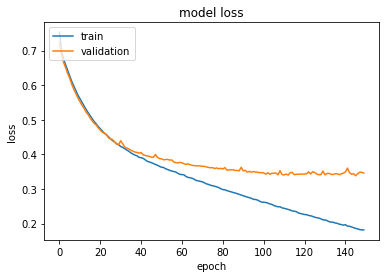

In [232]:
print(historic.history.keys())
plt.plot(historic.history['loss'])
plt.plot(historic.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


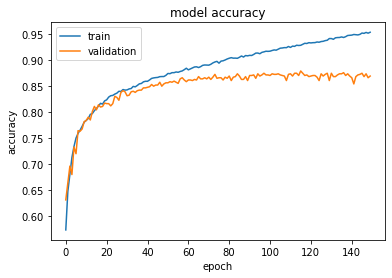

In [233]:
print(historic.history.keys())
plt.plot(historic.history['accuracy'])
plt.plot(historic.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [162]:
from tqdm import tqdm

test_dataset.reset()
X_test, y_test = next(test_dataset)
for i in tqdm(range(len(test_dataset)-1)): #1st batch is already fetched before the for loop.
  img, label = next(test_dataset)
  X_test = np.append(X_test, img, axis=0 )
  y_test = np.append(y_test, label, axis=0)
print(X_test.shape, y_test.shape)

100%|█████████████████████████████████████████████████████████████████████████████| 2305/2305 [00:14<00:00, 156.63it/s]

(2306, 32, 32, 1) (2306,)


In [222]:
# Model Recall: what percentage of positive tuples are labelled as such?
y_pred = np.around(model.predict(X_test))

recall_average = recall_score(y_test,y_pred, average="micro")

print("Recall:",recall_average)

Recall: 0.8681699913269731


In [223]:
# Model Accuracy: how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

# Model Precision: what percentage of positive tuples are labeled as such?
print("Precision:",metrics.precision_score(y_test, y_pred, average="macro"))

Accuracy: 0.8681699913269731
Precision: 0.8702197232061324


In [194]:
#confusion matrix
import pandas as pd
labels = list(training_dataset.class_indices.keys())
conf_matrix = confusion_matrix(y_test, y_pred)
conf_matrix = pd.DataFrame(conf_matrix, index=labels, columns=labels)

<AxesSubplot:>

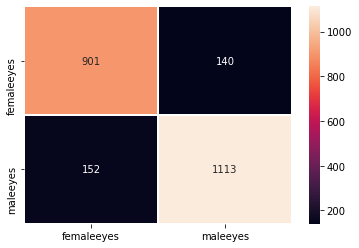

In [195]:
sns.heatmap(conf_matrix, annot=True, linewidths=1, fmt='g')

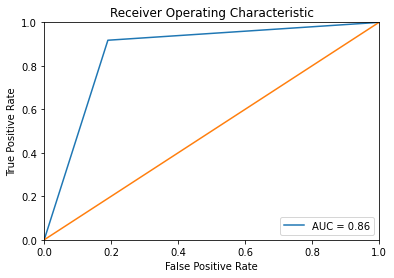

In [186]:
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred) #fpr = False Positive Rate, tpr = True Positive Rate
roc_auc = metrics.auc(fpr, tpr)

plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1])
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()